In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg

In [2]:
'''import zipfile 
zip_ref = zipfile.ZipFile('/content/dog.zip')
zip_ref.extractall('/content')
zip_ref.close()'''

"import zipfile \nzip_ref = zipfile.ZipFile('/content/dog.zip')\nzip_ref.extractall('/content')\nzip_ref.close()"

In [3]:
datadir = '/content/dog'
img_array = []
path = os.path.join(datadir)
for img in os.listdir(path):
  img_array.append(mpimg.imread(os.path.join(path, img)))

In [4]:
img_array= np.array(img_array, dtype=np.float32)
X_train = img_array/255

In [5]:
np.shape(X_train)

(400, 256, 256, 3)

In [6]:
'''zip_ref = zipfile.ZipFile('/content/testIMGS.zip')
zip_ref.extractall('/content')
zip_ref.close()'''

"zip_ref = zipfile.ZipFile('/content/testIMGS.zip')\nzip_ref.extractall('/content')\nzip_ref.close()"

In [7]:
datadir = '/content/testIMGS'
img_arr = []
path = os.path.join(datadir)
for img in os.listdir(path):
  img_arr.append(mpimg.imread(os.path.join(path, img)))

In [8]:
img_arr= np.array(img_arr, dtype=np.float32)
X_test = img_arr/255

In [9]:
noise_factor = 0.4
x_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

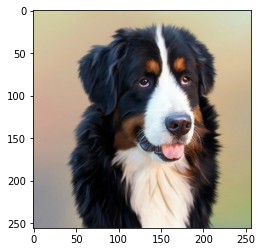

In [10]:
plt.imshow(X_train[23])
plt.show()

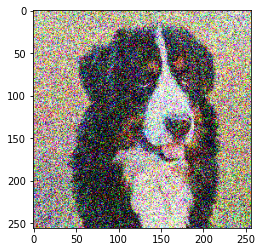

In [11]:
plt.imshow(x_train_noisy[23])
plt.show()

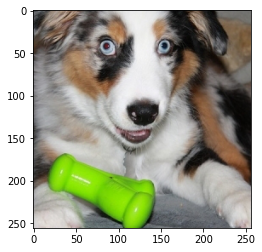

In [12]:
plt.imshow(X_test[3])
plt.show()

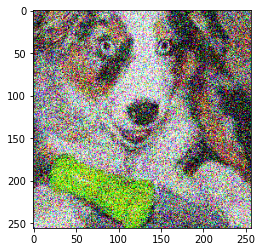

In [13]:
plt.imshow(x_test_noisy[3])
plt.show()

In [14]:
import keras
from keras import layers


input_img =keras.Input(shape=(X_train.shape[1:]))

#256
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

#128
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

#64

x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
encoded = x


x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded)
#128

x = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
#256


x= layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
decoded = x

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         435   

In [15]:
autoencoder.fit(x_train_noisy, X_train,
                epochs=2500,
                batch_size=128,
                shuffle=True,
                )

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 11s 537ms/step - loss: 0.2606 - accuracy: 0.4619
Epoch 2/2500
4/4 [==============================] - 2s 338ms/step - loss: 0.2011 - accuracy: 0.4730
Epoch 3/2500
4/4 [==============================] - 1s 299ms/step - loss: 0.1405 - accuracy: 0.4999
Epoch 4/2500
4/4 [==============================] - 1s 300ms/step - loss: 0.1299 - accuracy: 0.5013
Epoch 5/2500
4/4 [==============================] - 1s 299ms/step - loss: 0.1012 - accuracy: 0.4845
Epoch 6/2500
4/4 [==============================] - 1s 292ms/step - loss: 0.0880 - accuracy: 0.4323
Epoch 7/2500
4/4 [==============================] - 1s 297ms/step - loss: 0.0750 - accuracy: 0.4034
Epoch 8/2500
4/4 [==============================] - 1s 298ms/step - loss: 0.0636 - accuracy: 0.3960
Epoch 9/2500
4/4 [==============================] - 1s 286ms/step - loss: 0.0529 - accuracy: 0.3659
Epoch 10/2500
4/4 [==============================] - 1s 297ms

In [16]:
decoded_imgs = autoencoder.predict(x_test_noisy)

1/1 [==============================] - 0s 362ms/step


In [17]:
decoded_imgs =  np.clip(decoded_imgs, 0.0, 1.0)

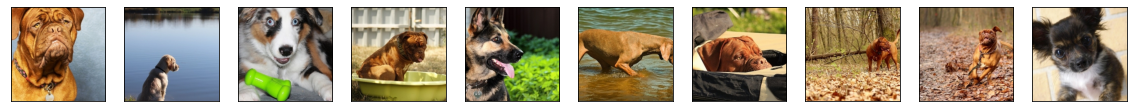

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

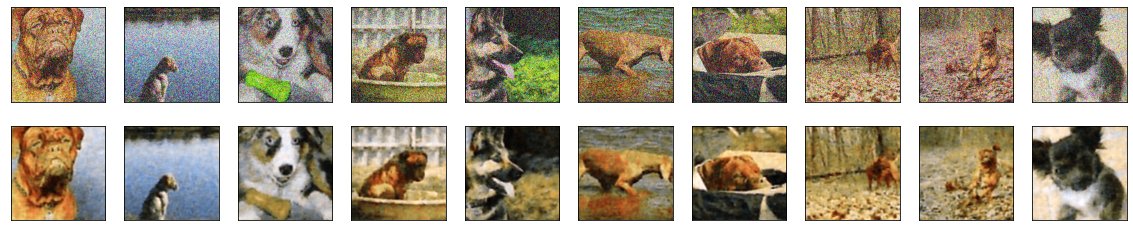

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display noisy
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
encoder = keras.Model(input_img, encoded)
codes = encoder.predict(X_test)

1/1 [==============================] - 0s 73ms/step


In [21]:
noise_factor = 0.4
encoded_imgs = codes + noise_factor * np.random.normal(0,1,size=codes.shape)

In [22]:
decoder = keras.Model(encoded, decoded)
decoded_imgs = decoder.predict(encoded_imgs)

1/1 [==============================] - 0s 61ms/step


In [23]:
decoded_imgs = np.clip(decoded_imgs, 0.0, 1.0)

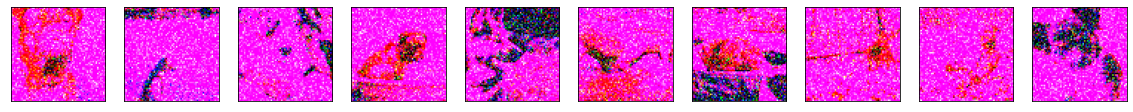

In [24]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display encoded
    ax = plt.subplot(2, n, i)
    plt.imshow(encoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


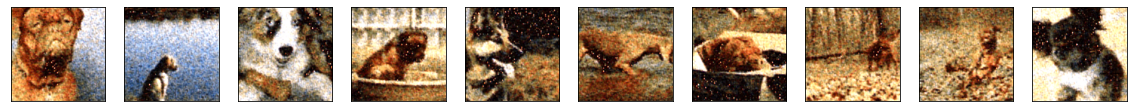

In [25]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display decoded
    ax = plt.subplot(2, n, i)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)